# Loading images and computing relevant statistics

**[Faisal Z. Qureshi](http://vclab.science.uoit.ca)**  

You can find excellent documentation for Pytorch at [https://pytorch.org/docs/stable/index.html](https://pytorch.org/docs/stable/index.html)

Loading an image using PIL and showing it using matplotlib

In [1]:
from PIL import Image

filename = './3063.png'
image = Image.open(filename)
print(image)

<PIL.PngImagePlugin.PngImageFile image mode=P size=481x321 at 0x7FCE2C1AC6D8>


In [2]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

<Figure size 640x480 with 1 Axes>

Converting the image to a numpy array.

Shape of im (321, 481)


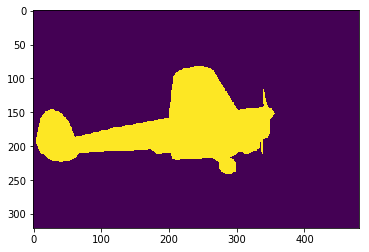

In [3]:
import numpy as np
im = np.array(image)
print('Shape of im', im.shape)
plt.imshow(im)
plt.show()

Converting an image to a torch tensor.

We use `torchvision.transforms.ToTensor()` to convert the PIL image to a tensor.  Note that torch assumes that the first dimension includes channels.  This is different from how we typically represent images.  In general we assume that the last dimension includes channels.

This suggests we will have to transpose the torch tensor before we can display it using matplotlib.  Of course this assumes that tensor type is `float` and pixel values lie between 0.0 and 1.0.

In [4]:
from torchvision import transforms
t = transforms.Compose([transforms.ToTensor()])
tim = t(image)
print('Shape of torch tensor representing our image', tim.shape)

Shape of torch tensor representing our image torch.Size([1, 321, 481])


torch.Size([321, 481])


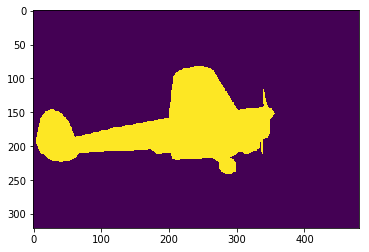

In [6]:
timcopy = tim.transpose(0,2).transpose(0,1).squeeze()
print(timcopy.shape)
plt.imshow(timcopy)
plt.show()

Computing mean and variance for red, blue and green channels.

We assume that an image is `(num_channels) x (num_rows) x (num_columns)`.  Note that num_rows refer to the height of the image, num_columns refer to the width of the image.  We will first reshape the image as `(num_channels) x [(num_rows) x (num_columns)]` and then use `torch.mean` to compute mean values for each row (i.e., each channel).

This operation is routinely performed during a data preprocessing step.

In [7]:
import torch

#print(tim.shape)
tim2 = tim.view(3,-1)
#print(tim2.shape)
means = torch.mean(tim2, dim=1, keepdim=True)
print('Per-channel mean values are\n', means)

vars = torch.var(tim2, dim=1, keepdim=True)
print('Per-channel variance values are\n', vars)

Per-channel mean values are
 tensor([[0.0263],
        [0.4167],
        [0.0258]])
Per-channel variance values are
 tensor([[0.0256],
        [0.2431],
        [0.0251]])


We can use the mean and variance to normalize the image.  Each channel will be zero centered with variance 1.0

In [8]:
sds = torch.sqrt(vars)

t = transforms.Normalize(means, sds)

# This is our normalized image
nim = t(tim.clone()) # transform.Normalize seem to change the tensor inplace

# We can check that it is normalized, by computing its mean and standard deviation
print("Mean and variance before normalization:")
print(torch.mean(tim.view(3,-1), dim=1, keepdim=True))
print(torch.var(tim.view(3,-1), dim=1, keepdim=True))

print("Mean and variance after normalization.  We get 0 means and unit variance.")
print(torch.mean(nim.view(3,-1), dim=1, keepdim=True))
print(torch.var(nim.view(3,-1), dim=1, keepdim=True))

Mean and variance before normalization:
tensor([[0.0263],
        [0.4167],
        [0.0258]])
tensor([[0.0256],
        [0.2431],
        [0.0251]])
Mean and variance after normalization.  We get 0 means and unit variance.
tensor([[ 2.5974e-06],
        [ 2.4400e+00],
        [-3.1548e-03]])
tensor([[1.0000],
        [9.4953],
        [0.9813]])


See timing with and without using cuda

In [9]:
import time

is_cuda = torch.cuda.is_available()

print('Without cuda')
start_time_1 = time.time()
for i in range(100):
    tim.var()
end_time_1 = time.time()
print(end_time_1 - start_time_1)

if is_cuda:
    print('With cuda')
    tim_ = tim.cuda()
    start_time_2 = time.time()
    for i in range(100):
        tim_.var()
    end_time_2 = time.time()
    print(end_time_2 - start_time_2)

Without cuda
0.02993178367614746
With cuda
0.01963067054748535
